# KerasでMNISTデータを学習してみる

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop

## MNISTデータを読み込む
Kerasが自動でダウンロードしてくれる、これは凄いことです。

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 17s 1us/step


## MNISTデータを加工
28×28の画像が60,000枚ある。画像をすべて728個の要素を持つ一次元配列に整形する。

また、各要素は0~255の値を持つ。これを0~1の値に変換する。標準化？正規化？

更に、正解データをただのラベルからバイナリ表現に変換する。OneHotEncoding的な？

In [5]:
x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') # float32型に変換
x_test  = x_test.astype('float32')
x_train /= 255 # x_train = xtrain / 255
x_test  /= 255
y_train = keras.utils.to_categorical(y_train, 10) # translate y_train to binary class matrix
y_test  = keras.utils.to_categorical(y_test, 10)

## モデルの構築

Denseは第１引数に出力の次元を、第２引数に活性化関数を指定する。

今回、出力は0~9のそれぞれの確率を算出するので10次元である。

In [9]:
model = Sequential()
model.add(InputLayer(input_shape=(784,)))
model.add(Dense(10, activation='softmax')) # 活性化関数にsoftmax関数を指定
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## 学習

In [10]:
epochs = 20
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.6106 - acc: 0.8466 - val_loss: 0.3401 - val_acc: 0.9073
Epoch 2/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.3304 - acc: 0.9083 - val_loss: 0.2971 - val_acc: 0.9150
Epoch 3/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.3014 - acc: 0.9155 - val_loss: 0.2840 - val_acc: 0.9204
Epoch 4/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.2878 - acc: 0.9192 - val_loss: 0.2782 - val_acc: 0.9219
Epoch 5/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.2802 - acc: 0.9217 - val_loss: 0.2747 - val_acc: 0.9233
Epoch 6/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.2746 - acc: 0.9232 - val_loss: 0.2717 - val_acc: 0.9248
Epoch 7/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.2706

## 検証

In [11]:
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 11us/step

Test loss: 0.2686302809998393
Test accuracy: 0.928


学習したモデルを検証用データに適用した結果、92.8%の確率で正解を出力することができた。
Test lossって何だったっけ。

## 学習過程の可視化
historyにはmodel.fit()からの戻り値が格納されている。その内容は次のような学習過程を含んでいる。

 - loss : 学習用データを使って学習を終えた時点での損失。値が小さいほど正しい結果を出力するように学習できている。値が大きいほど正しい結果を出せていない。つまりは学習過程における誤答率？
 
 - val_loss : 検証用データを与えた際に、どれだけ正当したかを表す。値が小さいほど正当できている。

In [13]:
import matplotlib.pyplot as plt

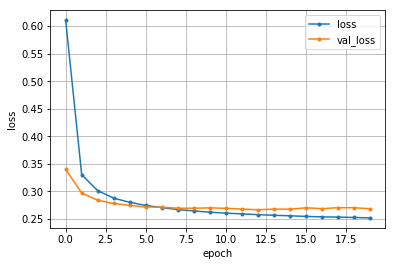

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)

plt.plot(range(nb_epoch), loss, marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)

plt.grid()

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

学習を進めるにつれて、lossとval_lossの両方が減少している。